In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("sem1-18_19.csv")
data

,matric,TUGASAN/20,Total_CPS3,AKHIR/40,PENILAIAN/20,Total_CPS7,PROJEK/20,Total_CPS9,TotalMarks,Grade,Fr_Assignment,Fr_Chat,Fr_Choice,Fr_File,Fr_File submissions,Fr_Folder,Fr_Forum,Fr_LTI,Fr_Online text submissions,Fr_Overview report,Fr_Quiz,Fr_Survey,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
0,182699,18.4,18.4,8.0,16.5,24.5,17.7,17.7,60.6,B-,5,0,1,21,0,3,2,0,0,0,80,0,45,4,0,161
1,185411,14.1,14.1,15.0,13.0,28.0,9.9,9.9,52.0,C,0,0,0,19,0,1,3,0,0,0,39,0,32,1,0,95
2,186439,18.4,18.4,7.0,13.0,20.0,17.7,17.7,56.1,C+,10,8,4,24,0,6,5,2,0,1,150,3,137,5,3,358
3,186783,11.4,11.4,29.5,6.0,35.5,15.5,15.5,62.4,B-,16,12,6,54,0,7,18,1,0,0,103,3,147,17,0,384
4,186917,11.4,11.4,14.0,14.0,28.0,15.5,15.5,54.9,C+,14,21,5,33,4,2,16,0,2,0,64,2,119,5,0,287
5,186933,14.9,14.9,31.5,20.0,51.5,17.8,17.8,84.2,A,44,13,5,62,6,2,55,1,2,0,160,1,259,11,0,621
6,186995,14.9,14.9,33.5,19.0,52.5,17.8,17.8,85.2,A,33,3,0,41,8,4,29,0,2,0,118,2,154,12,0,406
7,187021,11.4,11.4,27.0,11.5,38.5,15.5,15.5,65.4,B,4,10,4,39,0,3,33,3,0,0,187,2,124,7,0,416
8,187087,18.2,18.2,35.5,18.5,54.0,17.1,17.1,89.3,A,48,9,1,32,12,0,30,0,6,0,142,1,125,13,0,419
9,187287,14.1,14.1,13.0,8.5,21.5,9.9,9.9,45.5,D+,3,0,0,18,0,0,1,0,0,0,28,0,15,4,0,69


Now, we only want to extract numeric data only for correlation analysis. select_dtypes is use to select specific data type, object type is use to select string type data. Therefore, exclude is used to eliminate the object type.

In [3]:
numeric_data = data.select_dtypes(exclude=['object'])
numeric_data

,TUGASAN/20,Total_CPS3,AKHIR/40,PENILAIAN/20,Total_CPS7,PROJEK/20,Total_CPS9,TotalMarks,Fr_Assignment,Fr_Chat,Fr_Choice,Fr_File,Fr_File submissions,Fr_Folder,Fr_Forum,Fr_LTI,Fr_Online text submissions,Fr_Overview report,Fr_Quiz,Fr_Survey,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
0,18.4,18.4,8.0,16.5,24.5,17.7,17.7,60.6,5,0,1,21,0,3,2,0,0,0,80,0,45,4,0,161
1,14.1,14.1,15.0,13.0,28.0,9.9,9.9,52.0,0,0,0,19,0,1,3,0,0,0,39,0,32,1,0,95
2,18.4,18.4,7.0,13.0,20.0,17.7,17.7,56.1,10,8,4,24,0,6,5,2,0,1,150,3,137,5,3,358
3,11.4,11.4,29.5,6.0,35.5,15.5,15.5,62.4,16,12,6,54,0,7,18,1,0,0,103,3,147,17,0,384
4,11.4,11.4,14.0,14.0,28.0,15.5,15.5,54.9,14,21,5,33,4,2,16,0,2,0,64,2,119,5,0,287
5,14.9,14.9,31.5,20.0,51.5,17.8,17.8,84.2,44,13,5,62,6,2,55,1,2,0,160,1,259,11,0,621
6,14.9,14.9,33.5,19.0,52.5,17.8,17.8,85.2,33,3,0,41,8,4,29,0,2,0,118,2,154,12,0,406
7,11.4,11.4,27.0,11.5,38.5,15.5,15.5,65.4,4,10,4,39,0,3,33,3,0,0,187,2,124,7,0,416
8,18.2,18.2,35.5,18.5,54.0,17.1,17.1,89.3,48,9,1,32,12,0,30,0,6,0,142,1,125,13,0,419
9,14.1,14.1,13.0,8.5,21.5,9.9,9.9,45.5,3,0,0,18,0,0,1,0,0,0,28,0,15,4,0,69


Next, we need to inspect any column with missing data values.

In [4]:
columns_with_missing = [col for col in numeric_data.columns if numeric_data[col].isnull().any()]
len(columns_with_missing)

0

In [5]:
number_NaN = numeric_data.isna().sum()
number_NaN

TUGASAN/20                    0
Total_CPS3                    0
AKHIR/40                      0
PENILAIAN/20                  0
Total_CPS7                    0
PROJEK/20                     0
Total_CPS9                    0
TotalMarks                    0
Fr_Assignment                 0
Fr_Chat                       0
Fr_Choice                     0
Fr_File                       0
Fr_File submissions           0
Fr_Folder                     0
Fr_Forum                      0
Fr_LTI                        0
Fr_Online text submissions    0
Fr_Overview report            0
Fr_Quiz                       0
Fr_Survey                     0
Fr_System                     0
Fr_URL                        0
Fr_User report                0
totFreqParticipation          0
dtype: int64

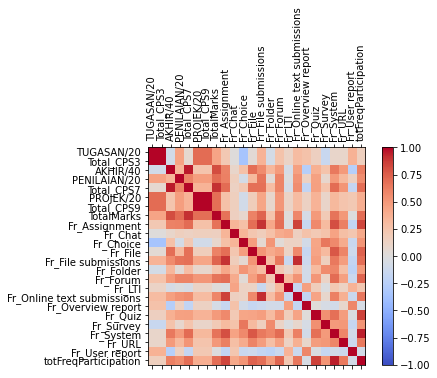

In [6]:
corr = numeric_data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,len(numeric_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)

ax.set_yticks(ticks)
ax.set_xticklabels(numeric_data.columns)
ax.set_yticklabels(numeric_data.columns)

plt.show()

In [7]:
corr

,TUGASAN/20,Total_CPS3,AKHIR/40,PENILAIAN/20,Total_CPS7,PROJEK/20,Total_CPS9,TotalMarks,Fr_Assignment,Fr_Chat,Fr_Choice,Fr_File,Fr_File submissions,Fr_Folder,Fr_Forum,Fr_LTI,Fr_Online text submissions,Fr_Overview report,Fr_Quiz,Fr_Survey,Fr_System,Fr_URL,Fr_User report,totFreqParticipation
TUGASAN/20,1.000000,1.000000,-0.078686,0.451965,0.069494,0.696795,0.696795,0.439396,0.216567,0.011797,-0.351401,0.045212,0.351764,-0.068540,0.255180,0.120231,0.302125,0.262674,0.151895,-0.144258,0.096418,0.098696,0.359648,0.161238
Total_CPS3,1.000000,1.000000,-0.078686,0.451965,0.069494,0.696795,0.696795,0.439396,0.216567,0.011797,-0.351401,0.045212,0.351764,-0.068540,0.255180,0.120231,0.302125,0.262674,0.151895,-0.144258,0.096418,0.098696,0.359648,0.161238
AKHIR/40,-0.078686,-0.078686,1.000000,0.350208,0.959073,0.248059,0.248059,0.819273,0.604165,0.099722,0.272781,0.690467,0.566608,0.330012,0.491147,-0.056504,0.465522,-0.263345,0.381419,0.257193,0.645104,0.496002,-0.250368,0.614581
PENILAIAN/20,0.451965,0.451965,0.350208,1.000000,0.601101,0.473209,0.473209,0.697394,0.616871,0.161387,-0.068058,0.320431,0.664812,0.045238,0.594885,-0.011166,0.529742,0.138688,0.459659,0.085239,0.493097,0.326101,0.143644,0.557699
Total_CPS7,0.069494,0.069494,0.959073,0.601101,1.000000,0.354697,0.354697,0.909831,0.701958,0.133871,0.212164,0.685977,0.684407,0.295243,0.598884,-0.051585,0.557327,-0.182762,0.464384,0.245206,0.699470,0.521772,-0.170191,0.692957
PROJEK/20,0.696795,0.696795,0.248059,0.473209,0.354697,1.000000,1.000000,0.689094,0.272876,0.157911,-0.083047,0.179486,0.431115,0.089580,0.509517,0.124384,0.304296,0.138287,0.353540,0.106726,0.324663,0.243287,0.216271,0.386280
Total_CPS9,0.696795,0.696795,0.248059,0.473209,0.354697,1.000000,1.000000,0.689094,0.272876,0.157911,-0.083047,0.179486,0.431115,0.089580,0.509517,0.124384,0.304296,0.138287,0.353540,0.106726,0.324663,0.243287,0.216271,0.386280
TotalMarks,0.439396,0.439396,0.819273,0.697394,0.909831,0.689094,0.689094,1.000000,0.678182,0.151807,0.078419,0.606578,0.733110,0.246988,0.666461,0.015652,0.587583,-0.057616,0.496602,0.196523,0.666304,0.502614,-0.007550,0.690354
Fr_Assignment,0.216567,0.216567,0.604165,0.616871,0.701958,0.272876,0.272876,0.678182,1.000000,0.344725,0.273573,0.688339,0.899195,0.426497,0.687759,-0.019252,0.857812,-0.153408,0.572656,0.311674,0.812459,0.617817,-0.182424,0.840570
Fr_Chat,0.011797,0.011797,0.099722,0.161387,0.133871,0.157911,0.157911,0.151807,0.344725,1.000000,0.344171,0.230033,0.175269,0.266864,0.404531,0.441428,0.153007,0.258793,0.207084,0.256750,0.452692,0.287317,0.234093,0.421254
